In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import plot_model

from machine_learning.logistic_regression_utils import extract_uganda_features, load_satellite_labels

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
f = h5py.File('data/assorted_images/satellite_images.h5','r')
print('Keys: %s' % f.keys())
a_group_key = list(f.keys())[0]

labels = load_satellite_labels()
feats = extract_uganda_features()
print(labels.shape)
print(feats.shape)

Keys: KeysView(<HDF5 file "satellite_images.h5" (mode r)>)
(512, 1)
(512, 4097)


In [3]:
data_original = np.array(f['data'])
data_copy = data_original.copy()
#np.array.shuffle(data_original)
labels = np.array(f['labels'])

# inds = []
# data_new = []
# labels_new = []
# labels_zero = []
# #for i in range(len(a)):
# for i in range(len(data_copy)):
#     if a[i] == 0:
#         inds.append(i)
#         labels_zero.append(labels[i])
#     else:
#         data_new.append(a[i])
#         labels_new.append(labels[i])
# #print(inds)
# sampled_inds = np.random.shuffle(inds)
# new = inds[:136]
# for r in range(136):
#     data_new.append(new[r])
#     labels_new.append(labels_zero)

# #shuffle dataset of 136 0s and 1s


import collections
print(collections.Counter(labels))

train_ratio, val_ratio = 0.9, 0.05
shuffled_ind = np.arange(data_original.shape[0])
np.random.shuffle(shuffled_ind)
shuffled_dset = data_original[shuffled_ind]
shuffled_lset = labels[shuffled_ind]

X_train = shuffled_dset[:int(data_original.shape[0]*train_ratio), ...]
y_train = shuffled_lset[:int(data_original.shape[0]*train_ratio), ...]

X_val = shuffled_dset[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]
y_val = shuffled_lset[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]

X_test = shuffled_dset[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]
y_test = shuffled_lset[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]

Counter({0: 505, 1: 136})


In [4]:
# train_ratio, val_ratio = 0.9, 0.05
# X_train = data_original[:int(data_original.shape[0]*train_ratio), ...] # ... means all the other axes
# y_train = labels[:int(data_original.shape[0]*train_ratio), ...]

# X_val = data_original[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]
# y_val = labels[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]

# X_test = data_original[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]
# y_test = labels[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]

# print(X_train.shape)
# print(X_test.shape)
# print(X_val.shape)

In [5]:
import keras
from keras.models import Sequential # Sequential is one of the main models in Keras, which is basically a sequentially stacked series of layers
from keras.callbacks import EarlyStopping

1e-06 4 32 3
Train on 576 samples, validate on 32 samples
Epoch 1/20
576/576 [==============================] - 6s 11ms/step - loss: 5.7224 - acc: 0.2222 - val_loss: 6.4310 - val_acc: 0.1250
Epoch 2/20
576/576 [==============================] - 6s 11ms/step - loss: 5.7060 - acc: 0.2222 - val_loss: 6.4128 - val_acc: 0.1250
Epoch 3/20
576/576 [==============================] - 7s 12ms/step - loss: 5.6904 - acc: 0.2222 - val_loss: 6.3947 - val_acc: 0.1250
Epoch 4/20
576/576 [==============================] - 7s 12ms/step - loss: 5.6741 - acc: 0.2222 - val_loss: 6.3768 - val_acc: 0.1250
Epoch 5/20
576/576 [==============================] - 7s 12ms/step - loss: 5.6580 - acc: 0.2222 - val_loss: 6.3589 - val_acc: 0.1250
Epoch 6/20
576/576 [==============================] - 7s 12ms/step - loss: 5.6424 - acc: 0.2222 - val_loss: 6.3409 - val_acc: 0.1250
Epoch 7/20
576/576 [==============================] - 7s 12ms/step - loss: 5.6262 - acc: 0.2222 - val_loss: 6.3231 - val_acc: 0.1250
Epoch 8/20


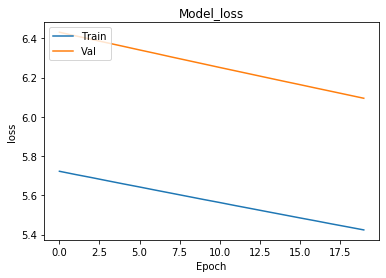

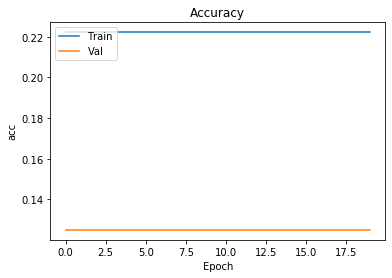

In [6]:
early_stopping = EarlyStopping(patience=50)
#model = create_model()

#learning rate = [10**-3, 3*10**-3, 10**-2,3*10**-2,0.1,0.3,1,3,10]
#learning_rate = [10**-3, 3*10**-3, 10**-2,3*10**-2]
learning_rate = [10**-6]
#layers = [2,3,4,5]
#CNN_layers = [2,3]
layers = [4]
CNN_layers = [3]
neurons = [32]
#neurons = [8,16,32,64]
# First we'll use fully-connected neural nets
#from keras.layers import Dense # Dense is Keras's name for fully connected layers
#class_weight = {0:1.,
#               1:3.}

for rate in learning_rate:
    for num in layers:
        for n in neurons:
            for c in CNN_layers:
                print(rate,num,n,c)
                model = Sequential() # Re-initialize the model
                for i in range(c):
                    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=(2, 2), padding='valid'))
                    model.add(keras.layers.Activation('relu'))
                    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # By default the stride is the same as the pooling size

                model.add(keras.layers.Flatten())
            
                for i in range(num-1):
                    model.add(keras.layers.Dense(n))
                    model.add(keras.layers.Activation('relu'))

                model.add(keras.layers.Dense(1))
                model.add(keras.layers.Activation('sigmoid'))

# Compilation
                model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0000001),metrics = ['accuracy']) #, 'f1'

# Training
                history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val),
                                    shuffle = True, callbacks=[early_stopping]) #class_weight=class_weight
            #print('\n',history.history.keys()) 

# Evaluation
                acc = model.evaluate(X_test, y_test)
                print('The test accuracy is: {}'.format(acc))

# And make predictions
                prob = model.predict(X_test) # These are probabilities, and we want to convert them to class labels
                #print(prob)
                label = np.array(prob > 0.5, dtype=int)
            
            #evaluate_acc(model)
                print('The predicted probabilities are: {}'.format(prob))
                print('The predicted class labels are: {}'.format(label))
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('Model_loss')
                plt.ylabel('loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Val'],loc='upper left')
                plt.show()
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('Accuracy')
                plt.ylabel('acc')
                plt.xlabel('Epoch')
                plt.legend(['Train','Val'],loc='upper left')
                plt.show()

In [7]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
# plt.title('Model_loss')
# plt.ylabel('loss')
# plt.xlabel('Epoch')
# plt.legend(['Train','Val'],loc='upper left')
# plt.show()

In [8]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model_loss')
# plt.ylabel('acc')
# plt.xlabel('Epoch')
# plt.legend(['Train','Val'],loc='upper left')
# plt.show()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


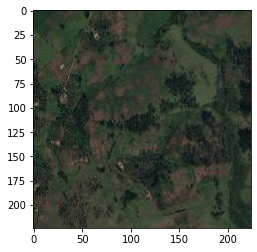

In [9]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

path = './data/satellite_images/'
img_list = os.listdir(path)
for i in range(len(img_list)):
    img = Image.open(path + img_list[i])
    img.load()
    data = np.asarray(img, dtype='int')
    plt.imshow(data)
    #print(data.shape)
    pred = model.predict(data[None, ...])
    if pred>0.5:
        pred = 1
    else:
        pred = 0
    print(pred)

a = np.load('./data/survey_data/uga_2011_labels.npy')
print(a)

In [10]:
inds = []
for i in range(len(a)):
    if a[i] == 0:
        inds.append(i)
#print(inds)
sampled_inds = np.random.shuffle(inds)
new = inds[:136]
print(new)

[615, 28, 446, 126, 371, 497, 20, 592, 231, 616, 591, 129, 336, 360, 574, 246, 572, 613, 321, 557, 288, 482, 242, 252, 368, 439, 488, 586, 40, 508, 119, 247, 136, 158, 14, 298, 76, 384, 111, 240, 317, 544, 46, 358, 209, 6, 427, 67, 202, 329, 236, 383, 299, 405, 520, 555, 71, 634, 596, 387, 395, 166, 623, 177, 307, 96, 244, 151, 83, 64, 607, 579, 507, 275, 27, 280, 417, 112, 301, 265, 356, 3, 350, 549, 576, 611, 635, 484, 207, 457, 445, 621, 262, 92, 153, 18, 190, 337, 211, 333, 149, 577, 84, 270, 108, 361, 156, 170, 273, 324, 283, 569, 474, 485, 377, 443, 601, 618, 415, 440, 335, 205, 105, 490, 429, 539, 53, 113, 284, 422, 455, 575, 78, 436, 385, 640]


In [11]:
# import numpy as np
# import os
# from PIL import Image

# # Make visualization dataset
# path = './data/satellite_images/'
# img_list = os.listdir(path)
# for i in range(len(img_list)):
#     img = Image.open(path + img_list[i])
#     img.load()
#     data = np.asarray(img, dtype='int')
#     plt.imshow(data)
#     #print(data.shape)
#     pred = model.predict(data[None, ...])
#     if pred>0.5:
#         pred = 1
#     else:
#         pred = 0
#     print(pred)
# print('---')
# print(np.load('./data/survey_data/uga_2011_labels.npy'))